In [15]:
os.getcwd()
os.chdir("C:\\Users\\sinem\\Desktop")

import pandas as pd

import seaborn as sns

import os

import numpy as np

import matplotlib.pyplot as plt


In [23]:

class Information():

    def __init__(self, df):
        self.df = df

    def Describer(self):
        print(df.describe().T)
        
    def LookHead(self):
        print(df.head(6))
     
    def preprocess(self):
        missing_values = ["n/a", "na", "--", "nan"]
        df = pd.read_csv("df.csv", na_values = missing_values)
        df['bad'] = df.bad.astype('category')
        df.dropna(inplace=True)
        print (df.isnull().sum())
        print(df.info())        
     
df = pd.read_csv('df.csv')
df['bad'] = df.bad.astype('category')

a = Information(df)
a.LookHead()
a.Describer()
a.preprocess()
        



    

  bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0   0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1   0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2   0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3   0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4   0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   
5   0  17200   39316.0   66978.0  DebtCon  NaN   4.0    0.0     0.0   99.99   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  
5   1.0  10.0   26.437  
          count           mean           std      min       25%        50%  \
loan     3576.0   18529.697987  11262.834060  1100.00  11000.00  16200.000   
mortdue  3262.0   74013.907992  44016.833772  2619.00  46700.25  65858.000   
value    3512.0  101076.922759  54865

In [24]:
import seaborn as sns 
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 

class Visualization:

    def __init__(self, df):

        self.df = df


    def BoxPlot(self):
        import seaborn as sns
        import matplotlib.pyplot as plt
        df.boxplot()
      

df = pd.read_csv('df.csv') 
b=Visualization(df)


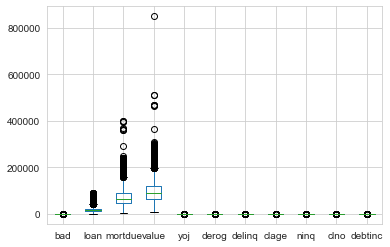

In [362]:
b.BoxPlot()

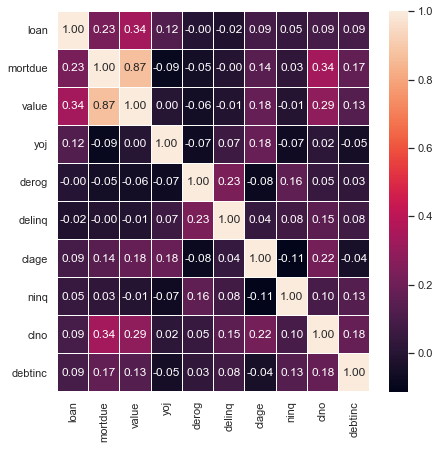

In [498]:
df2=df.copy()
df2 = df2.drop(columns=['bad' , 'job', 'reason'])    
fig,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(df2.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()
#Value and mortdue have strong postive realtionship
#value and loan have weak positive relationship.

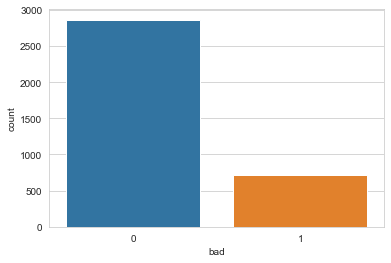

In [315]:
sns.countplot(df.bad)

In [323]:
pd.crosstab(index=df["reason"], columns=df["bad"])

#according to this; people's almost 1/4 did not pay back their credit.


bad,0,1
reason,,
DebtCon,1931,440
HomeImp,814,244


In [379]:
pd.crosstab(index=df["derog"], columns=df["bad"])

bad,0,1
derog,,
0.0,2254,452
1.0,162,103
2.0,49,49
3.0,10,25
4.0,4,10
5.0,4,4
6.0,4,6
7.0,0,7
8.0,0,3


In [19]:
from scipy import stats
import scipy.stats as stats
from scipy.stats import shapiro
import statsmodels.api as sm
import pylab
stats.describe(df.loan)



DescribeResult(nobs=3576, minmax=(1100, 89900), mean=18529.697986577183, variance=126851431.06960154, skewness=2.049604648222838, kurtosis=7.101453299904799)

In [20]:
shapiro(df['loan'])

#this varibale are not normally distributed

(0.8493258953094482, 0.0)

In [21]:
import scipy as cipy 
stats.levene(df.mortdue,df.value)
#H0=equal variances
#HA= not equal variances

#p-value<0.05 we'll reject null hypothesis. Their variances are not equal.

LeveneResult(statistic=nan, pvalue=nan)

In [33]:
#Examine  whether the strong relationship between value and mortdue are valid or not

from scipy.stats import pearsonr 
 
# Convert dataframe into series 
list1 = df['value'] 
list2 = df['mortdue'] 
# Apply the pearsonr() 
pearsonr(list1, list2) 

#The pearsons correlation coefficient can be used to evaluate relationship between more than two variables.
#We can see that two variables are positively correlated and the correaltion is 0.86

#H0: correlation =0
#HA: correlation is not equal to zero



ValueError: array must not contain infs or NaNs

In [36]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [34]:
print(list(df.columns))
missing_values = ["n/a", "na", "--", "nan"]
df = pd.read_csv("df.csv", na_values = missing_values)
df.dropna(inplace=True)
      

['bad', 'loan', 'mortdue', 'value', 'reason', 'job', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc']


In [35]:
df.dropna()
df.isnull().sum()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [37]:
df['reason'].unique()


array(['DebtCon', 'HomeImp'], dtype=object)

In [38]:
df['job'].unique()

array(['Mgr', 'Office', 'Other', 'ProfEx', 'Sales', 'Self'], dtype=object)

In [39]:
#Create dummy variables

dms=pd.get_dummies(df[["job","reason"]])
dms.head()

,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self,reason_DebtCon,reason_HomeImp
153,1,0,0,0,0,0,1,0
154,1,0,0,0,0,0,1,0
155,1,0,0,0,0,0,1,0
156,1,0,0,0,0,0,0,1
157,1,0,0,0,0,0,1,0


In [40]:
dms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   job_Mgr         2018 non-null   uint8
 1   job_Office      2018 non-null   uint8
 2   job_Other       2018 non-null   uint8
 3   job_ProfEx      2018 non-null   uint8
 4   job_Sales       2018 non-null   uint8
 5   job_Self        2018 non-null   uint8
 6   reason_DebtCon  2018 non-null   uint8
 7   reason_HomeImp  2018 non-null   uint8
dtypes: uint8(8)
memory usage: 31.5 KB


# LOGISTIC REGRESSION


In [41]:
#logistic regression
df['bad'] = df.bad.astype('category')
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_, dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42, stratify=y)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   bad      2018 non-null   category
 1   loan     2018 non-null   int64   
 2   mortdue  2018 non-null   float64 
 3   value    2018 non-null   float64 
 4   reason   2018 non-null   object  
 5   job      2018 non-null   object  
 6   yoj      2018 non-null   float64 
 7   derog    2018 non-null   float64 
 8   delinq   2018 non-null   float64 
 9   clage    2018 non-null   float64 
 10  ninq     2018 non-null   float64 
 11  clno     2018 non-null   float64 
 12  debtinc  2018 non-null   float64 
dtypes: category(1), float64(9), int64(1), object(2)
memory usage: 207.0+ KB


In [42]:
#scikit-learn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.243691
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.181     
Dependent Variable: bad              AIC:              769.4101  
Date:               2020-08-23 17:06 BIC:              854.5597  
No. Observations:   1513             Log-Likelihood:   -368.71   
Df Model:           15               LL-Null:          -450.36   
Df Residuals:       1497             LLR p-value:      5.3350e-27
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
loan              -0.0000   0.0000 -1.5556 0.1198 -0.0000  0.0000
mortdue           -0.0000   0.0000 -0.9777 0.3282 -0.0000  0.0000


In [448]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [449]:
y_pred_train1 = logreg1.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg1.score(X_train, y_train)))
y_pred_train1.shape

Accuracy of logistic regression classifier on train set: 0.91


(1513,)

In [450]:
y_pred1 = logreg1.predict(X_train)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg1.score(X_train, y_train)))
y_pred1.shape

Accuracy of logistic regression classifier on test set: 0.91


(1513,)

In [451]:
print(classification_report(y_train, y_pred_train1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1380
           1       0.00      0.00      0.00       133

    accuracy                           0.91      1513
   macro avg       0.46      0.50      0.48      1513
weighted avg       0.83      0.91      0.87      1513



In [452]:
pvalues=result.pvalues
remove=pvalues[pvalues>0.05]
remove

loan              0.119810
mortdue           0.328207
value             0.947933
yoj               0.831969
reason_DebtCon    0.948320
dtype: float64

In [453]:
X_train2=X_train.drop(remove.index,axis=1)


In [454]:
X_test2=X_test.drop(remove.index,axis=1)

In [455]:
#scikit-learn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

logit_model2=sm.Logit(y_train,X_train2)
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.246636
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.171     
Dependent Variable: bad              AIC:              768.3216  
Date:               2020-08-06 20:55 BIC:              826.8619  
No. Observations:   1513             Log-Likelihood:   -373.16   
Df Model:           10               LL-Null:          -450.36   
Df Residuals:       1502             LLR p-value:      4.6123e-28
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
derog          0.5641    0.1447   3.8988  0.0001   0.2805   0.8477
delinq         0.7995    0.1047   7.6387  0.0000   0.5944   1.

In [456]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train2, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [457]:
y_pred_train = logreg.predict(X_train2)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train2, y_train)))
y_pred_train.shape

Accuracy of logistic regression classifier on train set: 0.92


(1513,)

In [458]:
y_pred = logreg.predict(X_test2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test2, y_test)))


Accuracy of logistic regression classifier on test set: 0.94


In [459]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred_train, y_train)
print(confusion_matrix)

[[1373  111]
 [   7   22]]


In [460]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred, y_test)
print(confusion_matrix)

[[459  31]
 [  1  14]]


In [461]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1380
           1       0.76      0.17      0.27       133

    accuracy                           0.92      1513
   macro avg       0.84      0.58      0.62      1513
weighted avg       0.91      0.92      0.90      1513



In [462]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       460
           1       0.93      0.31      0.47        45

    accuracy                           0.94       505
   macro avg       0.94      0.65      0.72       505
weighted avg       0.94      0.94      0.92       505



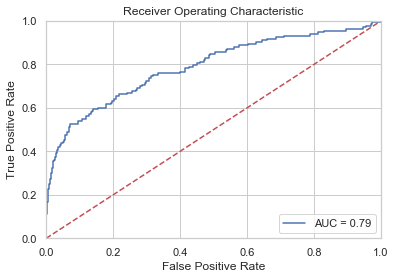

In [463]:
#ROC CURVE AND AUC
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs_train = logreg.predict_proba(X_train2)
preds_train = probs_train[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds_train)
roc_auc_train = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

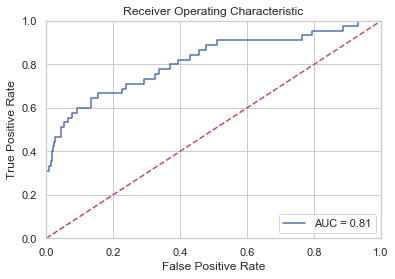

In [464]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [465]:
cross_val_score(logreg, X_test2, y_test,cv=10).mean()

0.9287843137254903

In [466]:
cross_val_score(logreg, X_train2, y_train,cv=10).mean()

0.9233356570233532

# DECISION TREE

In [43]:
!pip install xgboost



In [618]:
!pip install astor

In [488]:
!pip install lightgbm

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.1.


In [45]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train,y_train)
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [623]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9465346534653465

In [518]:
!pip install skompiler

  Created wheel for skompiler: filename=SKompiler-0.5.5-py3-none-any.whl size=57151 sha256=5cb8bc5f12c293404bc57a65eda5b5c73dc4d59915bccb0d565e6974dcd7e547
  Stored in directory: c:\users\sinem\appdata\local\pip\cache\wheels\1f\f6\09\b8aec43d39ab30463488d91526f29ba56155a6a6d61cf69986
Successfully built skompiler


In [619]:

from skompiler import skompile
print(skompile(cart_model.predict).to('python/code'))

(((1 if x[8] <= 2.5 else (((1 if x[2] <= 24585.5 else 0) if x[2] <= 36624.0
     else (1 if x[11] <= 0.5 else 1 if x[9] <= 32.196499824523926 else 0) if
    x[3] <= 9.0 else 0 if x[7] <= 1.5 else 1) if x[0] <= 9650.0 else ((0 if
    x[4] <= 6.0 else 1) if x[2] <= 47382.0 else 1 if x[0] <= 12750.0 else 0
    ) if x[7] <= 3.5 else 1) if x[2] <= 48739.5 else 1 if x[6] <= 
    43.650001525878906 else ((((1 if x[6] <= 83.15499877929688 else 0 if x[
    8] <= 21.5 else 1) if x[9] <= 22.527999877929688 else (((((((1 if x[1] <=
    38380.5 else ((0 if x[1] <= 66738.0 else 1 if x[1] <= 67355.5 else 0) if
    x[6] <= 106.68000030517578 else 1 if x[1] <= 60995.5 else 0) if x[0] <=
    9450.0 else 0 if x[8] <= 12.5 else 1) if x[10] <= 0.5 else 1) if x[0] <=
    9550.0 else (((0 if x[1] <= 45441.5 else 1) if x[7] <= 1.5 else 1) if x
    [1] <= 46266.5 else 0) if x[6] <= 80.26499938964844 else 0) if x[2] <= 
    82583.5 else 0 if x[6] <= 88.125 else 1) if x[2] <= 84981.0 else (0 if 
    x[1] <= 9406

In [536]:
?cart_model

In [626]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split": list(range(2,50)),
            "criterion":['gini', 'entropy']}

In [587]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [627]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart,cart_grid, cv = 10,n_jobs=-1,verbose=2)
cart_cv_model = cart_cv.fit(X_train , y_train)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 4320 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 8548 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed:   25.0s finished


In [628]:
print("En iyi parametreler:" + str(cart_cv_model.best_params_))

En iyi parametreler:{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 3}


In [629]:
cart = tree.DecisionTreeClassifier(criterion='gini', max_depth = 9 , min_samples_split=3)
cart_tuned = cart.fit(X_train, y_train)

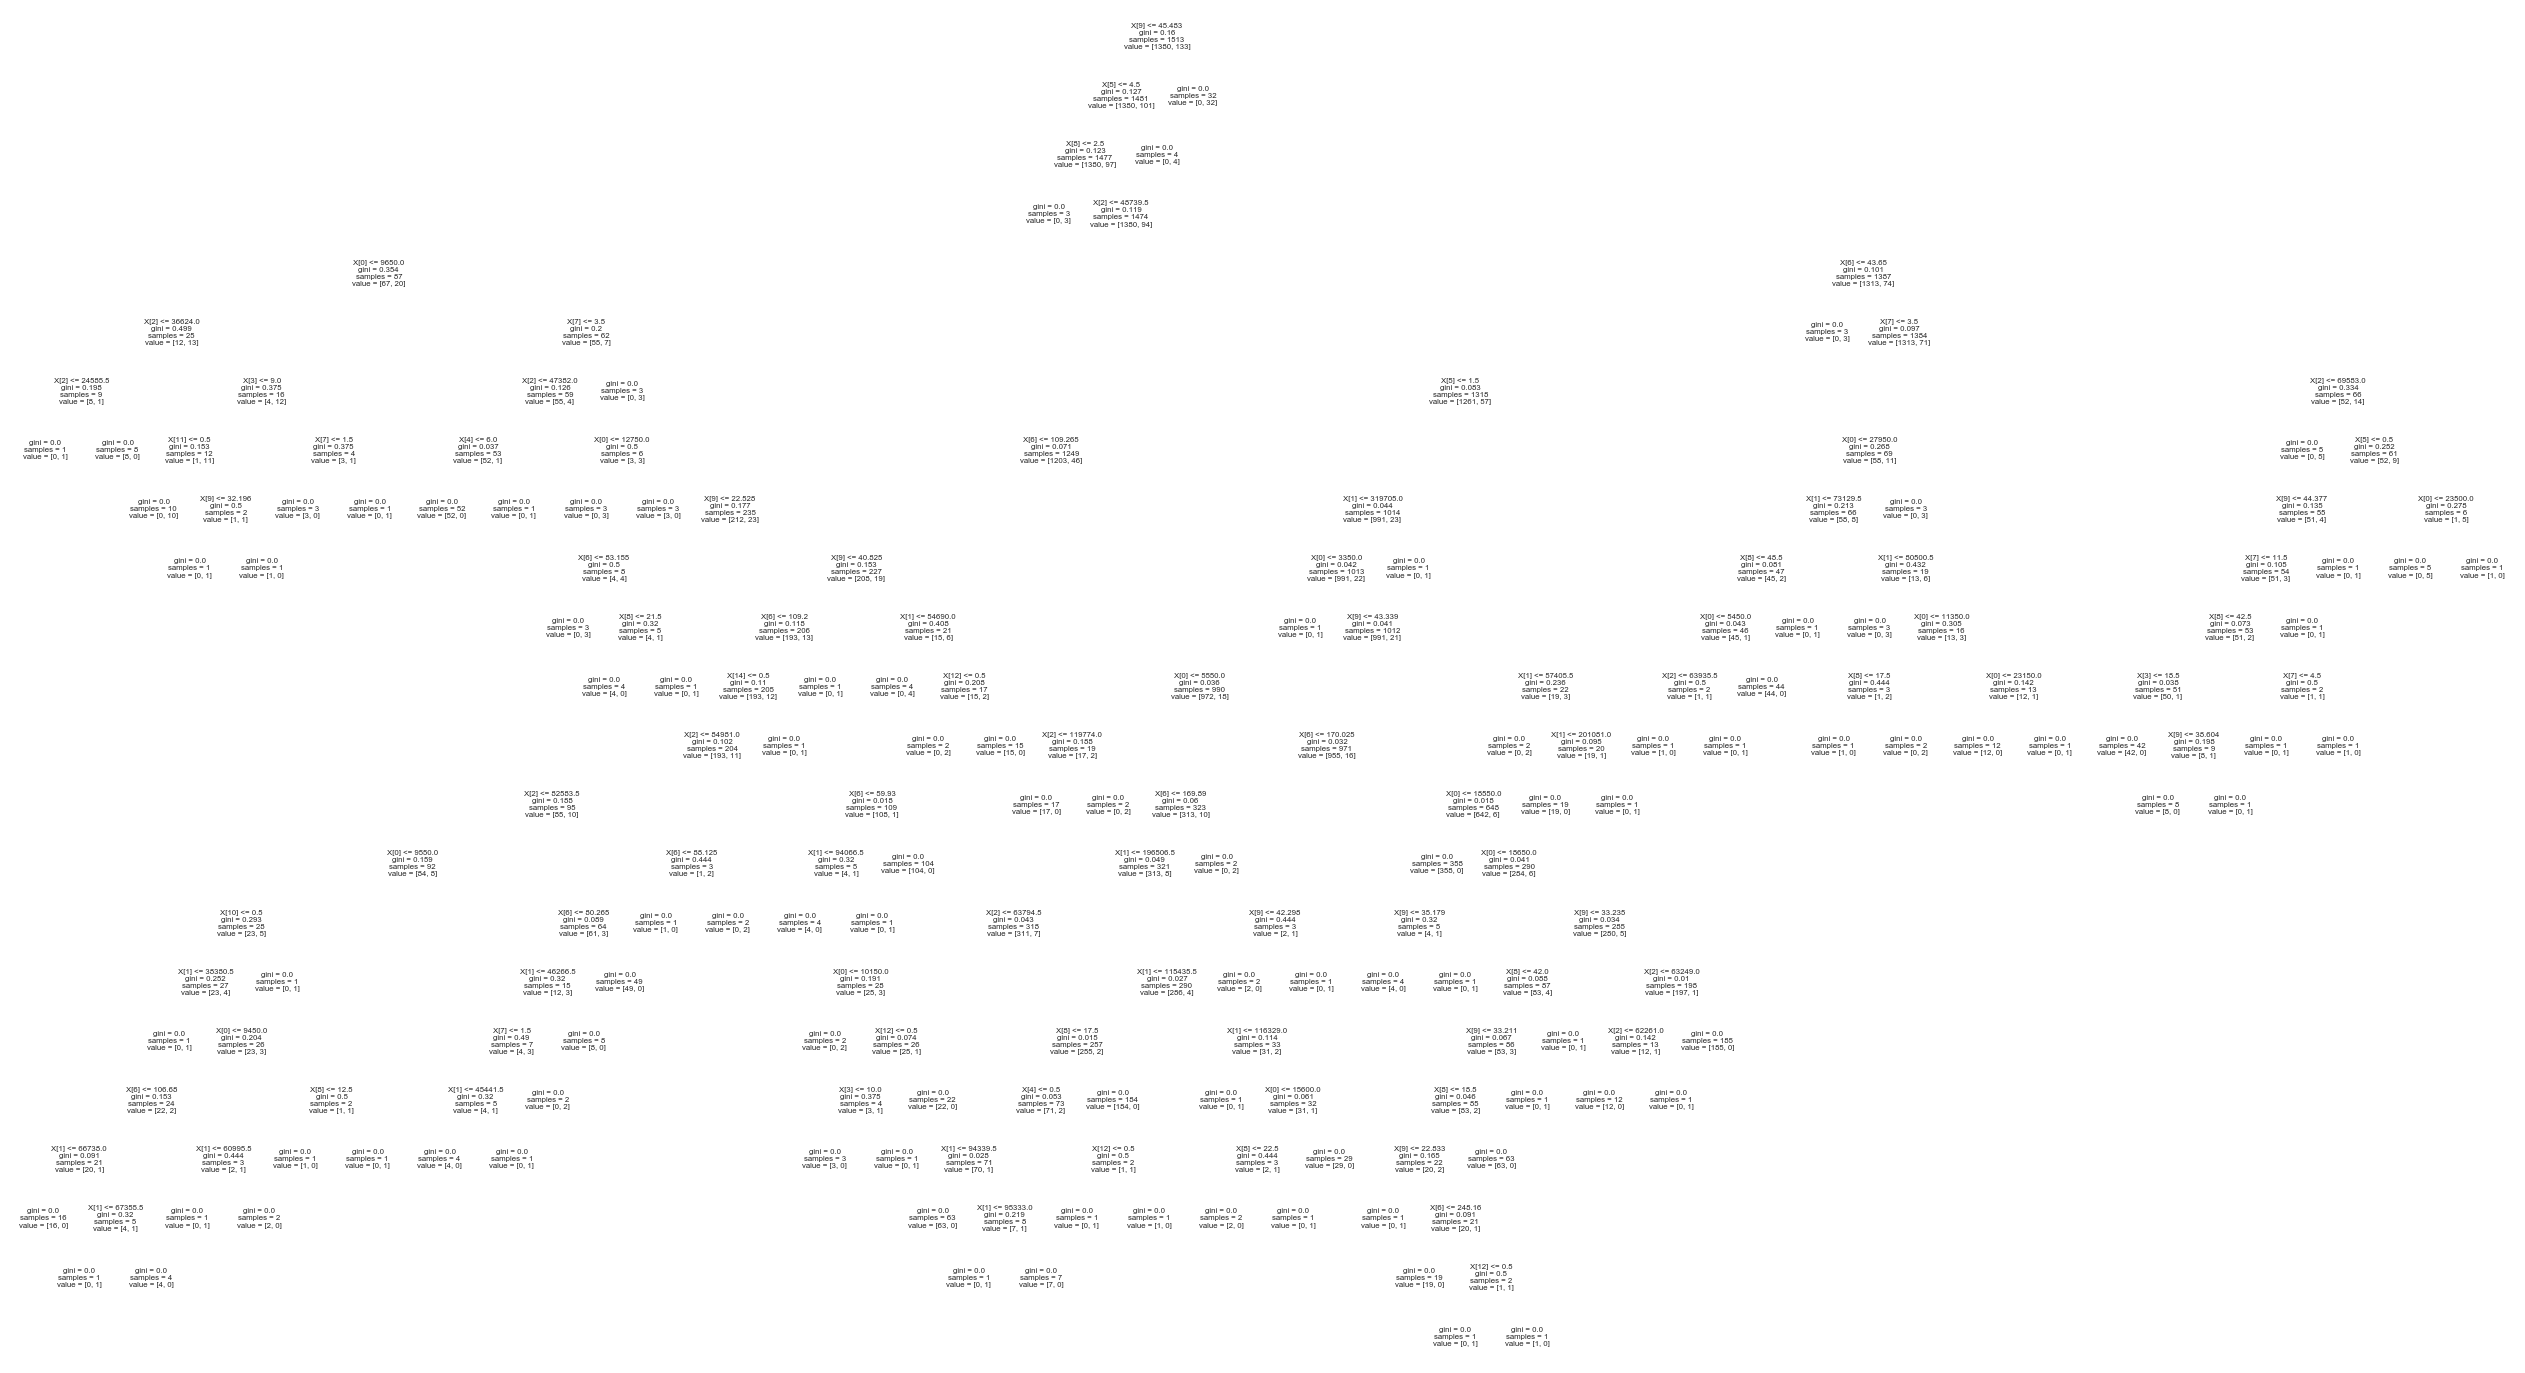

In [630]:
from sklearn import tree
plt.figure(figsize=(45,25))
tree.plot_tree(cart_model);

In [631]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9544554455445544

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

In [ ]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

MODEL TUNING

In [641]:
rf_params = {"max_depth": [2,5,8,10,13,15,],
             "max_features": [2,5,8,10,15],
             "n_estimators": [10,50,100,200],
             "min_samples_split": [3,5,15]}

In [642]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  5.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [634]:
rf_cv_model.best_params_

{'max_depth': 15,
 'max_features': 8,
 'min_samples_split': 3,
 'n_estimators': 50}

TUNED RANDOM FOREST

In [ ]:
rf_tuned = RandomForestClassifier(max_depth=15,
                                  max_features= 8,
                                  min_samples_split= 3,
                                  n_estimators= 50)
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index = X_train.columns)

Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh")
plt.xlabel("Degisken Onem Duzeyleri")
plt.show()

RANDOM FOREST ACCORDING TO VARIABLE IMPORTANCE

In [ ]:
X2=df.drop(["job","reason","bad"],axis=1)
y2=df["bad"]
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
Xtrain, Xtest, ytrain, ytest = train_test_split( X2, y2, test_size=0.25, random_state=42, stratify=y2)


In [637]:
from sklearn.ensemble import RandomForestClassifier
rf_model2 = RandomForestClassifier().fit(Xtrain, ytrain)
rf_model2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [639]:
ypred = rf_model2.predict(Xtest)
accuracy_score(ytest, ypred)

0.9623762376237623

# NEURAL NETWORK

In [656]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [657]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(x_train_scaled, y_train)
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Model Tuning

In [658]:
y_pred = mlp_model.predict(x_test_scaled)
accuracy_score(ytest,y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [659]:
mlp_param2 = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(10,10,10),
                                    (20,20), 
                                    (100,50,150), 
                                    (300,200,150),
                                    (3,5),
                                    (5,3)],
             "activation": ["relu","logistic"],
             "solver": ["lbfgs", "adam","sgd"]}


mlp_cv_model = GridSearchCV(mlp_model, mlp_param2, cv=10, n_jobs=-1, verbose=2)
mlp_cv_model.fit(x_train_scaled, ytrain)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 15.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100, 20),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_sta...
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.00

In [660]:
mlp_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (300, 200, 150),
 'solver': 'adam'}

MODEL TUNED

In [ ]:
mlp_tuned = MLPClassifier(alpha= 0.005, hidden_layer_sizes=(300,200,150), activation="relu", solver="sgd")
mlp_tuned.fit(x_train_scaled, ytrain)
y_pred = mlp_tuned.predict(x_test_scaled)
accuracy_score(ytest,y_pred)

# SVM

In [3]:
!pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=820978e6af7984e5871af92a0c94558271b0f574298b9654507a45cf8bf8c013
  Stored in directory: c:\users\sinem\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [51]:
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, MinMaxScaler, Normalizer, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.decomposition import PCA
import timeit
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
svc_params = {'C' : np.arange(1,10), 'kernel' : ['linear' , 'rbf' ,'poly']}

svc=SVC()

svc_cv_model= GridSearchCV(svc, svc_params, cv=10, n_jobs=-1,verbose=2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.4min


In [ ]:
print('En iyi paramey-treler:' + str(svc_cv_model.best_params_))

In [ ]:
svc_tuned = SVC(C=10 , gamma=0.0001).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned.predict(X_test)

In [ ]:

accuracy_score(y_test , y_pred)

# NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

In [ ]:
nb_model.predict(X_test)[0:10]
nb_model.predict_proba(X_test)[0:10]
y_pred = nb_model.predict(X_test)
accuracy_score(y_test , y_pred)

In [ ]:
cross_val_score(nb_model , X_test , y_test , cv=10).mean()

In [ ]:
nb_params = {'priors' : [(0.1,0.9) ,(0.2,0.8) , (0.3 , 0.7)] }
nb = GaussianNB()
nb_cv = GridSearchCV(nb, nb_params ,cv =10)
nb_cv.fit(X_train, y_train)
print('En iyi skor:'  + str(nb_cv.best_score_) )
print('En iyi parametreler:'  + str(nb_cv.best_params_))

In [ ]:
nb = GaussianNB(priors= (0.3, 0.7))
nb_model = nb.fit(X_train, y_train)
nb_model

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
cross_val_score(nb_model , X_test , y_test , cv=10).mean()

Multinomial Naive Bayes

In [ ]:
#naive bayes all of variable
mnb = MultinomialNB()
mnb_model = mnb.fit(xtrain, ytrain)
pred = mnb_model.predict(xtest)

evaluation_metrics(ytest, y_pred)
print("\n",classification_report(ytest, y_pred))

In [ ]:
#naive bayes with Rf variable importance
xtrain, xtest, ytrain, ytest = train_test_splitting(data_minmax, "bad")
mnb = MultinomialNB()
mnb_model = mnb.fit(xtrain, ytrain)
pred = mnb_model.predict(xtest)

evaluation_metrics(ytest, y_pred)
print("\n",classification_report(ytest, y_pred))

Bernoulli Naive Bayes

In [ ]:
#using all features
bnb = BernoulliNB()
bnb_model = bnb.fit(X_train, ytrain)
y_pred = bnb_model.predict(x_test)

evaluation_metrics(y_test, y_pred)
print("\n",classification_report(y_test, y_pred))

In [ ]:
#using variabloe importance features
bnb = BernoulliNB()
bnb_model = bnb.fit(Xtrain, ytrain)
pred = bnb_model.predict(Xtest)

evaluation_metrics(ytest, y_pred)
print("\n",classification_report(ytest, y_pred))

# GRADIENT BOOSTING

Cat Boost Tree

In [ ]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

In [ ]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
catb_params = {"iterations": [100,400],
              "learning_rate": [0.01,0.05,0.1],
              "depth": [3,5,8,10]}

In [ ]:
catb = CatBoostClassifier()

In [ ]:
catb_cv = GridSearchCV(catb, catb_params, cv=10, n_jobs=-1, verbose=2)

In [ ]:
catb_cv.fit(X_train, y_train)
print(f"best params: {catb_cv.best_params_}")

In [ ]:

catb = CatBoostClassifier(depth = 8,
                                iterations = 200,
                                learning_rate = 0.01)

In [ ]:
catb_tuned = catb.fit(X_train, y_train)

In [ ]:

y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# KNN

In [ ]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train , y_train)
knn_model

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
knn_params = {'n_neighbors' : np.arange(1,20) , "metric" : ["minkowski" , "euclidean" , "manhattan" , ]}

In [ ]:

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params , cv = 10)

knn_cv.fit(X_train,y_train)

print("En iti skoor"  + str(knn_cv.best_score_))
print("en iyi parametreler" + str(knn_cv.best_params_))

In [ ]:
knn_cv.algorithm = "brute"
knn_cv.n_neighbors = 10
knn_cv.metric = "manhattan"
knn_cv.leaf_size = 5
knn_tuned = knn_cv.fit(xtrain, ytrain)
y_pred = knn_tuned.predict(xtest)
print(accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))